In [32]:
import pandas as pd
import numpy as np 
import os
import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# For investigating timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing

# Modeling
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Importing prophet
from prophet import Prophet

### Loading Data

In [33]:
# Reading Data
base_path =  os.getcwd()
file_name = 'Traffic_Data.xlsx'
total_path = base_path + '//Data//' 
df = pd.read_excel(total_path + file_name, sheet_name='Sheet1')

# Filtering for just one state
df = df[df['State'] == 'Washington']
df = df.sort_values(by = ['Date'])
df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
3058,Washington,West,130,4586,4383,January,1,2019,2019-01-01
3007,Washington,West,158,4089,4474,February,2,2019,2019-02-01
2956,Washington,West,166,5245,5233,March,3,2019,2019-03-01
2905,Washington,West,170,5404,5229,April,4,2019,2019-04-01
2854,Washington,West,169,6041,5844,May,5,2019,2019-05-01
2803,Washington,West,163,5881,5758,June,6,2019,2019-06-01
2752,Washington,West,163,5816,5742,July,7,2019,2019-07-01
2701,Washington,West,125,5626,5516,August,8,2019,2019-08-01
2650,Washington,West,158,5721,5660,September,9,2019,2019-09-01
2599,Washington,West,161,5241,5189,October,10,2019,2019-10-01


### Splitting Into Test/Train

In [34]:
test_train_split = 0.8
pre_split = df[['CMILES', 'Date']].copy()
pre_split = pre_split.rename(columns= {'CMILES':'y',
                                       'Date':'ds'})
train = pre_split[:int(test_train_split * len(pre_split['y']))]
test = pre_split[int(test_train_split * len(pre_split['y'])):]
print('Total Length: ', len(pre_split))
print('Train Length: ', len(train))
print('Test Length: ', len(test))
test.head(10)


Total Length:  60
Train Length:  48
Test Length:  12


,y,ds
610,858,2023-01-01
559,3772,2023-02-01
508,4750,2023-03-01
457,4698,2023-04-01
406,5387,2023-05-01
355,5537,2023-06-01
304,5945,2023-07-01
253,5885,2023-08-01
202,5216,2023-09-01
151,5015,2023-10-01


### Fitting Prophet Model

In [35]:
model = Prophet()
model.fit(train)

10:12:24 - cmdstanpy - INFO - Chain [1] start processing
10:12:24 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting

c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


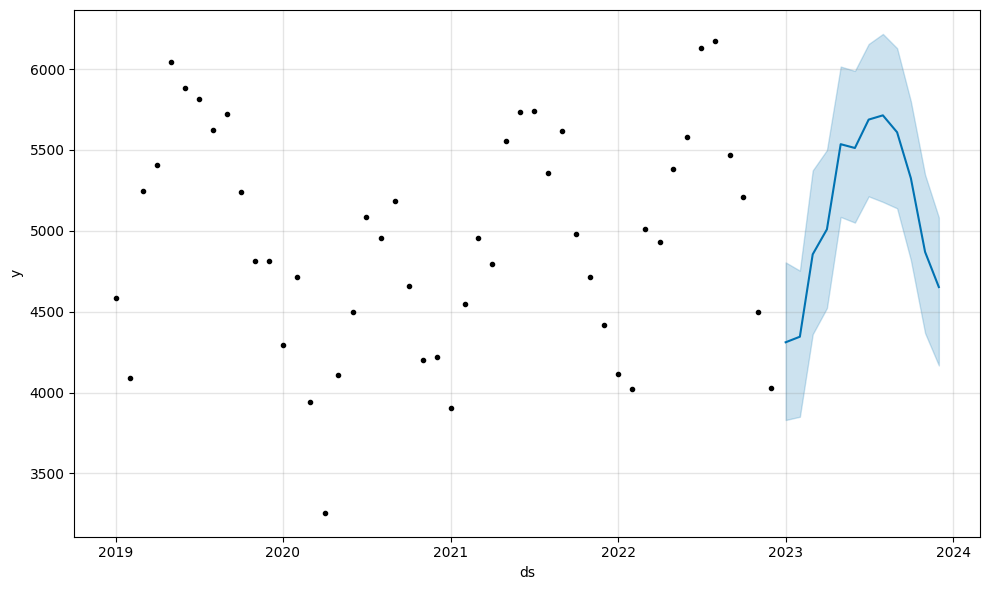

In [36]:
forecast = model.predict(test)
fig1 = model.plot(forecast)

In [37]:
# Want to Assess module performance
y_true = test['y'].values
y_pred = forecast['yhat'].values
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAE: ', mape)

MAE:  0.3858606779440302


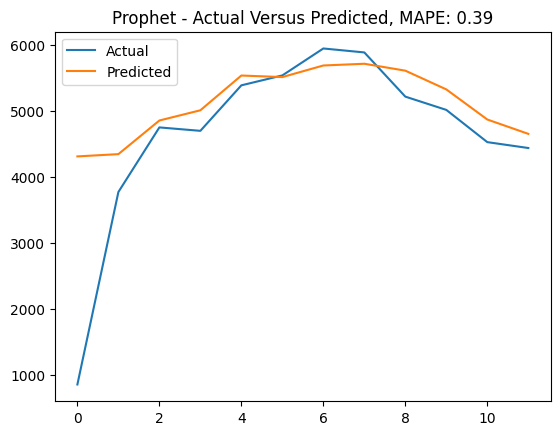

In [38]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.title("Prophet - Actual Versus Predicted, MAPE: "+ str(round(mape,2)))
pyplot.legend()
pyplot.show()